## Coding Excercise Regression#

### 1. Linear regression with 'Galton' data:

In [1]:
# Import package yang dipake buat Linear Regression

import numpy as np # Package buat prediksi array
import pandas as pd # Package buat prosessing tabel
import matplotlib.pyplot as plt # Package buat visualisi data LInear Regression
import seaborn as sns # Package  buat visualisasi data lebih cantik
import os # Package buat proses folder
from sklearn.linear_model import LinearRegression # Package untuk bikin model linear regression
%matplotlib inline

#### 1.1. Read in data and visualize:

In [ ]:
# Go to the directory where the data file is located.
# os.chdir(r'~~')                # Please, replace the path with your own.

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTfLsxuiSj5MVLl6ABGE6tBZqBEm_o3ugvbwir4ZMhNQprN9HFnfUF9GiGyYU3ChWEkW040b7QGQy0K/pub?gid=280617370&single=true&output=csv', header='infer')

In [4]:
# Tampilkan 10 data pertama

df.head( 10 )

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
5,62.2,67.5
6,62.2,67.5
7,62.2,67.5
8,62.2,66.5
9,62.2,66.5


In [5]:
# There are many repeated values.
# So, we summarize as a cross table.

# Kita bikin tabel frekuensi
# Untuk setiap parent kita bikin daftar gaji anak nya
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [6]:
# Transform the cross table so that it could be displyed as a Scatter plot.
# Size of point = Frequency.

# Usahakan nama variable meenjelaskan isi dari data tersebut
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

In [7]:
combo.head()

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1


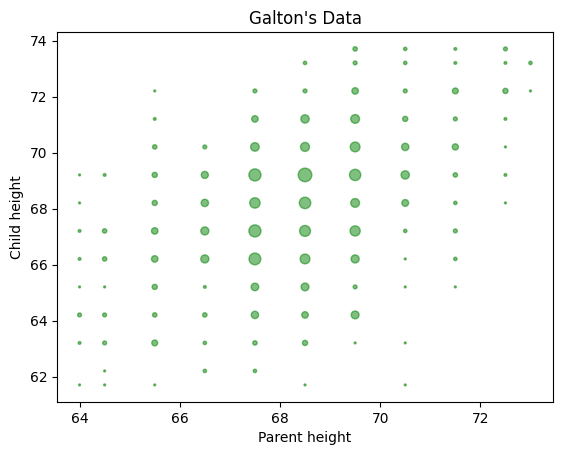

In [8]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [10]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [11]:
# Train.

# Kita training model Linear Regression untuk input fitur x = tinggi orang tua dan prediksi y = tinggi anak
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [12]:
# Show the intercept.

# Tunjukkan nilai konstan dari linear regression
lm.intercept_

array([23.94153018])

In [13]:
# Show the slope.
lm.coef_

array([[0.64629058]])

#### 1.3. Visualization of the regression line:

In [14]:
# Predicted Y.

# Prediksi input fitur tinggi orang tua dengan model Linear Regression yang udah dilatih
predY = lm.predict(df[['parent']])

In [15]:
df[['parent']]

,parent
0,70.5
1,68.5
2,65.5
3,64.5
4,64.0
...,...
923,69.5
924,69.5
925,69.5
926,69.5


In [16]:
predY

array([[69.50501621],
       [68.21243505],
       [66.2735633 ],
       [65.62727272],
       [65.30412743],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [65.62727272],
       [69.50501621],
       [68.85872563],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.30412743],
       [65.30412743],
       [68.85872563],
       [68

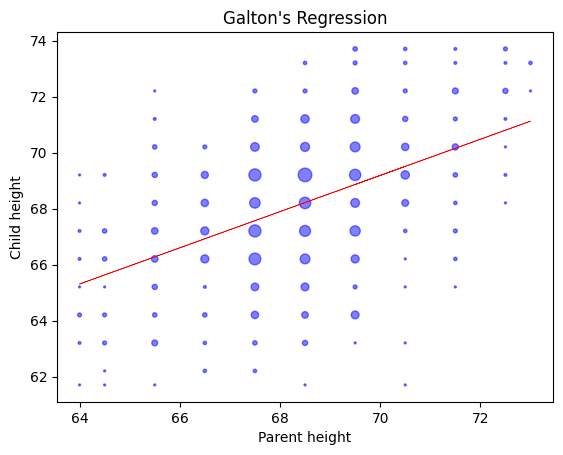

In [17]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()

### House Price

In [18]:
# Import package yang dibutuhkan

import pandas as pd # Package untuk proses data
from sklearn.linear_model import LinearRegression # Package untuk pakai model Linear Regression
from sklearn.metrics import mean_squared_error # Package untuk evaluasi model Linear Regression

In [20]:
# Load the data from the CSV file

# Input data dari file csv
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQBtIFVKd7xxiax0qAjADYy5yMlHntbdF_pxRj67Qjbgl9a44qhw0AQ14_Eu8vAxiwHv7p9q8KAvp0B/pub?gid=1272501787&single=true&output=csv", sep=",")

data.head()


,Harga Rumah (Rp.juta),Luas Lantai (m2)
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100


In [21]:
data.describe()

,Harga Rumah (Rp.juta),Luas Lantai (m2)
count,10.000000,10.000000
mean,286.500000,1715.000000
std,60.185362,417.864944
min,199.000000,1100.000000
25%,247.500000,1456.250000
50%,293.500000,1650.000000
75%,317.250000,1831.250000
max,405.000000,2450.000000


In [22]:
# Extract features (independent variables) and target variable (dependent variable)

# Pertama bikin x = input feature luas lantai
X = data["Luas Lantai (m2)"]  # Feature

# Lalu bikin variabel output = harga rumah yang diprediksi
y = data["Harga Rumah (Rp.juta)"]  # Target

In [23]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X.values.reshape(-1, 1), y) # Kita ubah input array menjadi array size ( jumlah data x jumlah kolom (1))

LinearRegression()

In [24]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_)



Coefficients: 0.10976773783009867
Intercept: 98.24832962138078


**Dari model Linear Regression kita dapat harga rumah minimal adal 98.24 juta dan setiap 1 m2 harga tanah naik 0.109 juta**

In [25]:
# Make predictions
luas_rumah = 2000  # Input feature
predicted_price = model.predict([[luas_rumah]])
print(f"Predicted Price: {predicted_price[0]} juta", )

Predicted Price: 317.7838052815781 juta


In [26]:
predicted_prices = model.predict(X.values.reshape(-1, 1))
mse = mean_squared_error(y, predicted_prices)
print("Mean Squared Error:", mse)

Mean Squared Error: 1366.5565224307989


In [28]:
print( "Machine Learning kita bisa prediksi harga rumah dari harga tanah dengan error sekitar " + str( mse**(0.5)))

Machine Learning kita bisa prediksi harga rumah dari harga tanah dengan error sekitar 36.96696528565469


### 1. Dummy variable and interaction:



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### 1.1. Read in the data:

In [30]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQSLy13ZkZxhDA56jFtzijAlDx8DYj7CXbkOuxFvZ08KcISYE6PLHAwhif51TBov4_VryE0_qcJUfno/pub?output=csv', header='infer',encoding='latin1')

In [31]:
# We will use 3 variables: height, weight and gender.
df.head(5)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [32]:
# Lihat statistik tabel data mahasiswa dengan fungsi info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       17 non-null     object 
 1   gender     17 non-null     object 
 2   age        17 non-null     int64  
 3   grade      17 non-null     int64  
 4   absence    17 non-null     object 
 5   bloodtype  17 non-null     object 
 6   height     17 non-null     float64
 7   weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


####  1.2. Linear regression without dummy variable:
<br>
The formula is: weight ~ height

In [34]:
# Do the regression as usual.
lm = LinearRegression() # Panggil model Linear Regression
X = df.height.values.reshape(-1,1) # Bikin input feature tinggi dari mahasiswa
Y = df.weight.values.reshape(-1,1) # Bikin output feature berat dari mahasiswa

# Training model Linear Regression
lm.fit(X,Y)

# Kita cek importance dari fitur tinggi dan nilai minimum dari tinggi mahasiswa atau intercept
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
rsq1 = lm.score(X,Y)
rmse1 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

print("Equation",f"{b0} + {b1}x")
print("R2 score dari model Machine Learning adalah",rsq1) # R2 adalah seberapa Model Linear Regression kita bisa memprediksi dataset yang kita punta
print("RMSE",rmse1)

Equation -109.44527907648313 + 1.0027917194700802x
R2 score dari model Machine Learning adalah 0.4411371950671862
RMSE 8.595442055909126


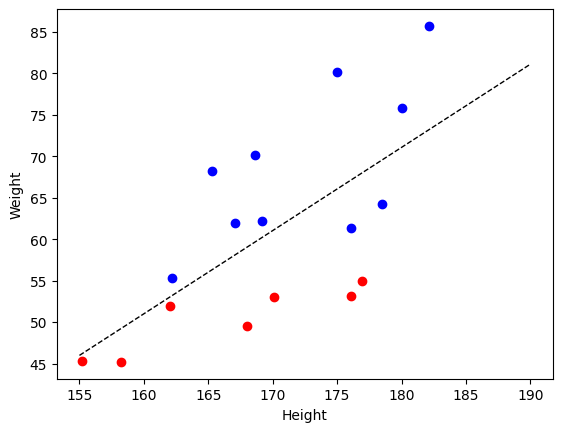

In [35]:
# Visualize.
# No need to distinguish the regression line by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

####  1.3. Linear regression with dummy variable:
<br>
**Prediksi berat mahasiswa berdasarkan tinggi mahasiswa dan gender Mahasiswa**

The formula is: weight ~ height + gender

In [36]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [43]:
# Do the regression as usual.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(X,Y)
rmse2 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

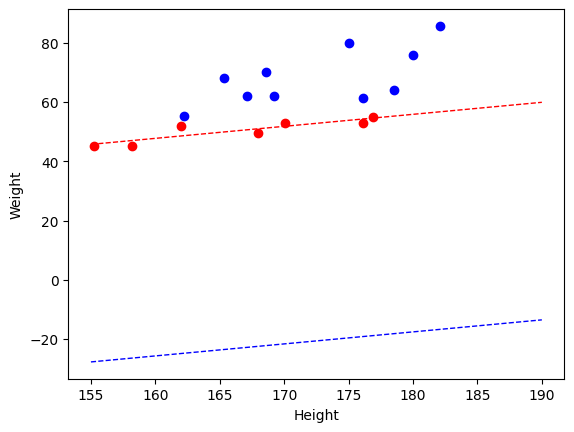

In [44]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

####  1.4. Linear regression with dummy variable that interacts:
<br>
The formula is: weight ~ height + gender + height $\times$ gender

In [ ]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [37]:
pd.get_dummies(df.gender, drop_first=True, prefix='gender')

,gender_M
0,True
1,False
2,True
3,True
4,False
5,False
6,False
7,False
8,True
9,True


In [38]:
# Create the interaction term.
X['height x gender_M'] = X['height']*X['gender_M']
X.head(5)

,height,gender_M,height x gender_M
0,165.3,True,165.3
1,170.1,False,0.0
2,175.0,True,175.0
3,182.1,True,182.1
4,168.0,False,0.0


In [40]:
# Do the regression as usual.

# Training model Linear Regression kita dengan LinearRegression.fit()
lm.fit(X,Y)
b0 = lm.intercept_[0] # Ambil nilai minimum dari berat mahasiswa
b1 = lm.coef_[0][0] # Feature importance dari kolom tinggi
b2 = lm.coef_[0][1] # Feature importance dari kolom gender mahasiswa
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y) # R2 adalah metrics seberapa model Linear Regression kita bisa prediksi dataset
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

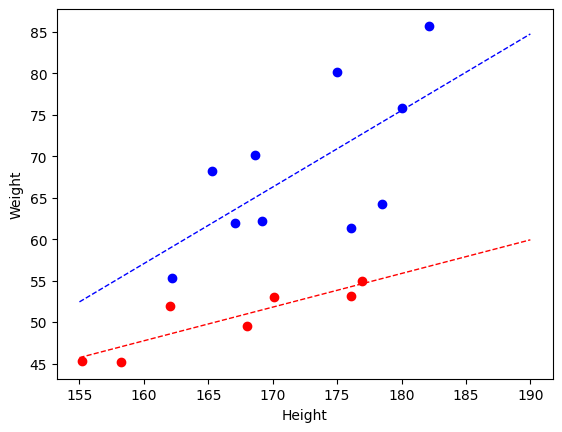

In [41]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 1.5. Compare  $R^2$, RMSE for the different cases:

In [45]:
np.round([rsq1, rsq2, rsq3],3)

array([0.441, 0.787, 0.787])

In [46]:
np.round([rmse1, rmse2, rmse3],3)

array([8.595, 5.307, 5.307])

NOTE: With a dummy variable that interacts, the $R^2$ is the highest and the *RMSE* is the lowest.